In [1]:
import sklearn.tree
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.datasets

 # Importing and Cleaning Rent data 

In [ ]:


rent = pandas.read_csv('/Users/nerenevaz/Downloads/FA13-2016-17.csv')
rent.dropna(inplace=True)
rent['DateLodgement'] = pandas.to_datetime(rent.DateLodgement,format='%m/%d/%Y')
rent['DateTenancyCommenced'] = pandas.to_datetime(rent.DateTenancyCommenced,format='%m/%d/%Y')
rent['BondAmount'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
rent['PremisesWeeklyRent'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
rent['BondAmount'] = rent['BondAmount'].convert_objects(convert_numeric=True)
rent['PremisesWeeklyRent'] = rent['PremisesWeeklyRent'].convert_objects(convert_numeric=True)
rent['DateLodgement'] = rent['DateLodgement'].apply(lambda x: x.strftime('%Y'))    
rent['DateTenancyCommenced'] = rent['DateTenancyCommenced'].apply(lambda x: x.strftime('%Y'))
rent['Premises_Postcode'] = rent['Premises_Postcode'].convert_objects(convert_numeric=True)
result = rent.groupby(['DateLodgement','Premises_Postcode','Premises_Suburb'], as_index=False).agg(
                      {'PremisesWeeklyRent':['mean']})
rent_mean = result.reset_index(drop=True)
##rent_mean = rent_mean[(rent_mean['Premises_Postcode'] >= 2000) & (rent_mean['Premises_Postcode'] <= 2250)]
rent_mean.Premises_Postcode = rent_mean.Premises_Postcode.round()
rent_mean.PremisesWeeklyRent = rent_mean.PremisesWeeklyRent.round()
rent_mean.head(5)

In [ ]:
# Creating a Weekly mean rent by year from the Rent data

Weekly_Mean_Rent = rent_mean[['Premises_Postcode','DateLodgement','PremisesWeeklyRent']]
Weekly_Mean_Rent.columns = Weekly_Mean_Rent.columns.swaplevel(0, 1)
Weekly_Mean_Rent.sortlevel(1, axis=1, inplace=True)
Weekly_Mean_Rent.columns = Weekly_Mean_Rent.columns.droplevel(-1)
Weekly_Mean_Rent.columns = ['PremisesWeeklyRent','Premises_Postcode','DateLodgement']
Weekly_Mean_Rent
results = Weekly_Mean_Rent.groupby(['DateLodgement','Premises_Postcode'], as_index=False).agg(
                      {'PremisesWeeklyRent':['mean']})
results.columns = results.columns.swaplevel(0, 1)
results.sortlevel(1, axis=1, inplace=True)
results.columns = results.columns.droplevel(-1)
results.columns = ['PremisesWeeklyRent','Premises_Postcode','DateLodgement']
Weekly_Mean_Rent = results
Weekly_Mean_Rent = Weekly_Mean_Rent.pivot(index='Premises_Postcode', columns='DateLodgement', values='PremisesWeeklyRent')
Weekly_Mean_Rent.head(10)

# Importing Crime Statistics

In [ ]:


police_stats = pandas.read_csv('/Users/nerenevaz/Downloads/PostcodeData2015.csv',index_col='Postcode')

# Cleaning the Crime data

In [ ]:


Offences = police_stats[['Offence category','Jan 2013',
 'Feb 2013',
 'Mar 2013',
 'Apr 2013',
 'May 2013',
 'Jun 2013',
 'Jul 2013',
 'Aug 2013',
 'Sep 2013',
 'Oct 2013',
 'Nov 2013',
 'Dec 2013',
 'Jan 2014',
 'Feb 2014',
 'Mar 2014',
 'Apr 2014',
 'May 2014',
 'Jun 2014',
 'Jul 2014',
 'Aug 2014',
 'Sep 2014',
 'Oct 2014',
 'Nov 2014',
 'Dec 2014',
 'Jan 2015',
 'Feb 2015',
 'Mar 2015',
 'Apr 2015',
 'May 2015',
 'Jun 2015',
 'Jul 2015',
 'Aug 2015',
 'Sep 2015',
 'Oct 2015',
 'Nov 2015',
 'Dec 2015']]
Offences_2013 = Offences.filter(like = '2013')
Offences_2013['2013'] = Offences_2013.sum(axis=1)
Offences_2013 = Offences_2013[['2013']]
Offences_2014 = Offences.filter(like = '2014')
Offences_2014['2014'] = Offences_2014.sum(axis=1)
Offences_2014 = Offences_2014[['2014']]
Offences_2015 = Offences.filter(like = '2015')
Offences_2015['2015'] = Offences_2015.sum(axis=1)
Offences_2015 = Offences_2015[['2015']]
Offences1 = Offences[['Offence category']]
Offences1.reset_index()
Offences = pandas.concat([Offences1, Offences_2013, Offences_2014,Offences_2015], axis=1, join_axes=[Offences1.index])
Offences.reset_index()
Offence = Offences.reset_index(drop=False)
Crime = Offence.groupby(['Postcode', 'Offence category'], as_index=False).sum()
##Crime = Crime[(Crime['Postcode'] >= 2000) & (Crime['Postcode'] <= 2250)]
Crime.head(5)

In [ ]:
Crime = Crime.pivot(index='Postcode', columns='Offence category')
Crime.head(5)

In [ ]:
Rent_Crime = pandas.concat([Crime, Weekly_Mean_Rent], axis=1, join_axes=[Crime.index])
Rent_Crime.reset_index(inplace=True)

In [ ]:

Rent_Crime.fillna(Rent_Crime.mean(),inplace=True)

In [ ]:
Rent_Crime.describe()

# Exporting file to clean column headers in excel and then reimporting it 

In [ ]:
Rent_Crime.to_csv('/Users/nerenevaz/Downloads/Rent_Crime.csv')

In [2]:

Rent_vs_Crime = pandas.read_csv('/Users/nerenevaz/Downloads/Rent_Crime_clean.csv')

In [3]:
Rent_vs_Crime = Rent_vs_Crime.round()
Rent_vs_Crime.dropna(inplace=True)
Rent_vs_Crime.sample(25)

Postcode  Crime_2013_Abduction and kidnapping  \
343      2478                                    3   
222      2295                                    1   
289      2400                                    2   
575      2871                                    1   
242      2322                                    1   
463      2703                                    1   
339      2474                                    0   
576      2873                                    0   
77       2097                                    0   
143      2171                                    0   
134      2161                                    1   
232      2307                                    1   
57       2075                                    1   
414      2585                                    1   
306      2426                                    1   
488      2738                                    0   
345      2480                                    0   
347      2482                                    0   
118      2144                                    1   
338      2473                                    1   
389      2558                                    0   
126      2153                                    1   
335      2470                                    1   
52       2070                                    0   
137      2164                                    1   

     Crime_2013_Against justice procedures  Crime_2013_Arson  \
343                                    172                18   
222                                     39                 3   
289                                    339               103   
575                                    104                11   
242                                     82                25   
463                                      7                 3   
339                                     17                 6   
576                                      0                 1   
77                                      21                 0   
143                                     38                17   
134                                     76                29   
232                                     16                 3   
57                                      16                 2   
414                                      0                 0   
306                                      3                 2   
488                                      2                 0   
345                                    342                44   
347                                     18                 3   
118                                    298                21   
338                                     18                 1   
389                                     23                 7   
126                                     49                 7   
335                                    202                38   
52                                       9                 3   
137                                     73                19   

     Crime_2013_Assault  Crime_2013_Betting and gaming offences  \
343                 280                                       1   
222                  61                                       0   
289                 368                                       1   
575                 134                                       0   
242                 181                                       0   
463                   6                                       0   
339                  57                                       0   
576                   5                                       0   
77                   62                                       0   
143                  85                                       0   
134                 240                                       0   
232                  27                                       0   
57                   29                                       0 

In [4]:
Rent_vs_Crime.describe()

Postcode  Crime_2013_Abduction and kidnapping  \
count   583.000000                           583.000000   
mean   2420.070326                             0.610635   
std     277.630500                             0.897318   
min    2000.000000                             0.000000   
25%    2174.000000                             0.000000   
50%    2403.000000                             0.000000   
75%    2644.500000                             1.000000   
max    4383.000000                             9.000000   

       Crime_2013_Against justice procedures  Crime_2013_Arson  \
count                             583.000000        583.000000   
mean                               91.638079         11.698113   
std                               193.287140         20.142144   
min                                 0.000000          0.000000   
25%                                 6.000000          1.000000   
50%                                22.000000          5.000000   
75%                                72.500000         12.000000   
max                              1936.000000        168.000000   

       Crime_2013_Assault  Crime_2013_Betting and gaming offences  \
count          583.000000                              583.000000   
mean           109.828473                                0.154374   
std            175.074745                                0.892991   
min              0.000000                                0.000000   
25%             17.000000                                0.000000   
50%             50.000000                                0.000000   
75%            131.000000                                0.000000   
max           1778.000000                               16.000000   

       Crime_2013_Blackmail and extortion  Crime_2013_Disorderly conduct  \
count                          583.000000                     583.000000   
mean                             0.154374                      38.336192   
std                              0.626047                      79.778108   
min                              0.000000                       0.000000   
25%                              0.000000                       5.000000   
50%                              0.000000                      14.000000   
75%                              0.000000                      37.500000   
max                             10.000000                     975.000000   

       Crime_2013_Drug offences  \
count                583.000000   
mean                  75.794168   
std                  161.943922   
min                    0.000000   
25%                    7.000000   
50%                   27.000000   
75%                   78.000000   
max                 1841.000000   

       Crime_2013_Harassment, threatening behaviour and private nuisance  \
count                                         583.000000                   
mean                                           50.190395                   
std                                            77.470689                   
min                                             0.000000                   
25%                                             9.000000                   
50%                                            22.000000                   
75%                                            59.000000                   
max                                           665.000000                   

          ...      Crime_2015_Prostitution offences  Crime_2015_Robbery  \
count     ...                            583.000000          583.000000   
mean      ...                              0.859348            4.969125   
std       ...                              3.869536           10.176572   
min       ...                              0.000000            0.000000   
25%       ...                              0.000000            0.000000   
50%       ...                              1.000000            2.000000   
75%       ...                              1.00000

In [5]:
Rent_vs_Crime.columns.unique()

array(['Postcode', 'Crime_2013_Abduction and kidnapping',
       'Crime_2013_Against justice procedures', 'Crime_2013_Arson',
       'Crime_2013_Assault', 'Crime_2013_Betting and gaming offences',
       'Crime_2013_Blackmail and extortion',
       'Crime_2013_Disorderly conduct', 'Crime_2013_Drug offences',
       'Crime_2013_Harassment, threatening behaviour and private nuisance',
       'Crime_2013_Homicide', 'Crime_2013_Liquor offences',
       'Crime_2013_Malicious damage to property',
       'Crime_2013_Other offences',
       'Crime_2013_Other offences against the person',
       'Crime_2013_Pornography offences',
       'Crime_2013_Prohibited and regulated weapons offences',
       'Crime_2013_Prostitution offences', 'Crime_2013_Robbery',
       'Crime_2013_Sexual offences', 'Crime_2013_Theft',
       'Crime_2013_Transport regulatory offences',
       'Crime_2014_Abduction and kidnapping',
       'Crime_2014_Against justice procedures', 'Crime_2014_Arson',
       'Crime_2014_As

# Plotting Rent vs Postcode data

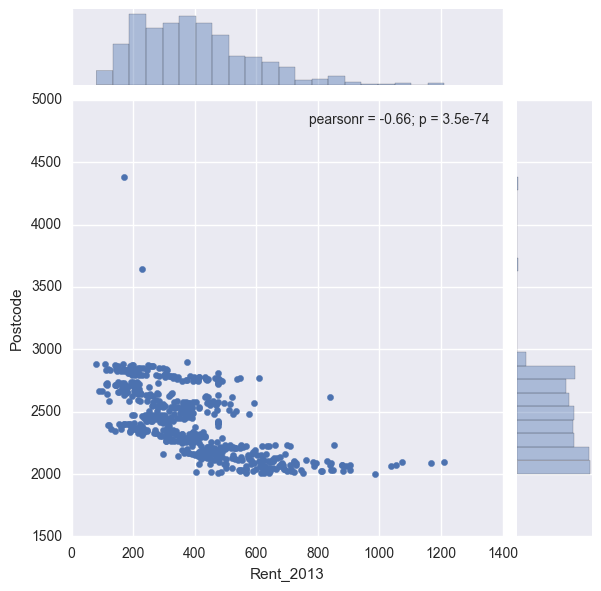

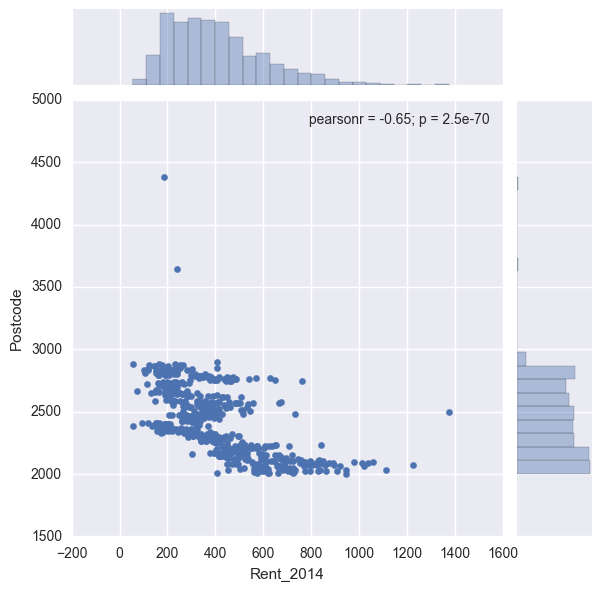

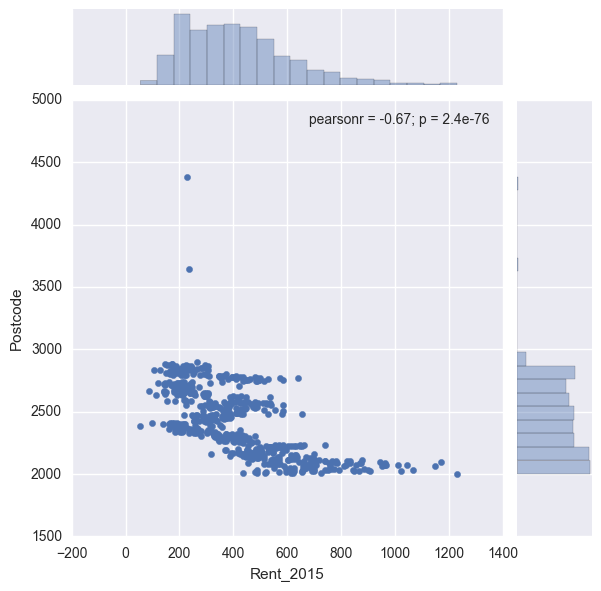

In [6]:
seaborn.jointplot(x='Rent_2013', y='Postcode', data=Rent_vs_Crime)
seaborn.jointplot(x='Rent_2014', y='Postcode', data=Rent_vs_Crime)
seaborn.jointplot(x='Rent_2015', y='Postcode', data=Rent_vs_Crime)

In [7]:
Rent_vs_Crime.set_index('Postcode',inplace=True)
Rent_vs_Crime.describe()

Crime_2013_Abduction and kidnapping  \
count                           583.000000   
mean                              0.610635   
std                               0.897318   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               9.000000   

       Crime_2013_Against justice procedures  Crime_2013_Arson  \
count                             583.000000        583.000000   
mean                               91.638079         11.698113   
std                               193.287140         20.142144   
min                                 0.000000          0.000000   
25%                                 6.000000          1.000000   
50%                                22.000000          5.000000   
75%                                72.500000         12.000000   
max                              1936.000000        168.000000   

       Crime_2013_Assault  Crime_2013_Betting and gaming offences  \
count          583.000000                              583.000000   
mean           109.828473                                0.154374   
std            175.074745                                0.892991   
min              0.000000                                0.000000   
25%             17.000000                                0.000000   
50%             50.000000                                0.000000   
75%            131.000000                                0.000000   
max           1778.000000                               16.000000   

       Crime_2013_Blackmail and extortion  Crime_2013_Disorderly conduct  \
count                          583.000000                     583.000000   
mean                             0.154374                      38.336192   
std                              0.626047                      79.778108   
min                              0.000000                       0.000000   
25%                              0.000000                       5.000000   
50%                              0.000000                      14.000000   
75%                              0.000000                      37.500000   
max                             10.000000                     975.000000   

       Crime_2013_Drug offences  \
count                583.000000   
mean                  75.794168   
std                  161.943922   
min                    0.000000   
25%                    7.000000   
50%                   27.000000   
75%                   78.000000   
max                 1841.000000   

       Crime_2013_Harassment, threatening behaviour and private nuisance  \
count                                         583.000000                   
mean                                           50.190395                   
std                                            77.470689                   
min                                             0.000000                   
25%                                             9.000000                   
50%                                            22.000000                   
75%                                            59.000000                   
max                                           665.000000                   

       Crime_2013_Homicide     ...      Crime_2015_Prostitution offences  \
count           583.000000     ...                            583.000000   
mean              0.226415     ...                              0.859348   
std               0.586376     ...                              3.869536   
min               0.000000     ...                              0.000000   
25%               0.000000     ...                              0.000000   
50%               0.000000     ...                              1.000000   
75%               0.000000     ...                              1.000000   
max               5.000000     ...                             92.000000   

    

# Splitting Data into 2014 , 2015

In [8]:
lat_lon = Rent_vs_Crime[["lat","lon"]]
lat_lon.sample()

lat    lon
Postcode             
2476     -28.0  152.0

In [9]:
Rent_vs_Crime2015 = Rent_vs_Crime.filter(regex=("2015"))
Rent_vs_Crime2015 = pandas.concat([Rent_vs_Crime2015, lat_lon], axis=1, join_axes=[lat_lon.index])
Rent_vs_Crime2015.describe()

Crime_2015_Abduction and kidnapping  \
count                           583.000000   
mean                              0.590051   
std                               0.942526   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               6.000000   

       Crime_2015_Against justice procedures  Crime_2015_Arson  \
count                             583.000000        583.000000   
mean                              100.535163          8.533448   
std                               212.175457         14.517622   
min                                 0.000000          0.000000   
25%                                 6.000000          1.000000   
50%                                25.000000          3.000000   
75%                                85.500000          9.000000   
max                              2432.000000        123.000000   

       Crime_2015_Assault  Crime_2015_Betting and gaming offences  \
count          583.000000                              583.000000   
mean           104.166381                                0.106346   
std            162.460489                                0.874816   
min              0.000000                                0.000000   
25%             15.000000                                0.000000   
50%             48.000000                                0.000000   
75%            129.000000                                0.000000   
max           1720.000000                               18.000000   

       Crime_2015_Blackmail and extortion  Crime_2015_Disorderly conduct  \
count                          583.000000                     583.000000   
mean                             0.226415                      36.792453   
std                              0.683775                      65.232072   
min                              0.000000                       0.000000   
25%                              0.000000                       5.000000   
50%                              0.000000                      16.000000   
75%                              0.000000                      38.000000   
max                              9.000000                     802.000000   

       Crime_2015_Drug offences  \
count                583.000000   
mean                  97.578045   
std                  197.695435   
min                    0.000000   
25%                    8.000000   
50%                   35.000000   
75%                   98.000000   
max                 2345.000000   

       Crime_2015_Harassment, threatening behaviour and private nuisance  \
count                                         583.000000                   
mean                                           51.195540                   
std                                            77.508715                   
min                                             0.000000                   
25%                                             8.000000                   
50%                                            24.000000                   
75%                                            62.500000                   
max                                           680.000000                   

       Crime_2015_Homicide     ...      Crime_2015_Pornography offences  \
count           583.000000     ...                           583.000000   
mean              0.174957     ...                             1.149228   
std               0.559446     ...                             1.709091   
min               0.000000     ...                             0.000000   
25%               0.000000     ...                             0.000000   
50%               0.000000     ...                             1.000000   
75%               0.000000     ...                             1.000000   
max               7.000000     ...                            13.000000   

       Crime_

In [10]:
Rent_vs_Crime2014 = Rent_vs_Crime.filter(regex=("2014"))
Rent_vs_Crime2014 = pandas.concat([Rent_vs_Crime2014, lat_lon], axis=1, join_axes=[lat_lon.index])
Rent_vs_Crime2014.describe()

Crime_2014_Abduction and kidnapping  \
count                           583.000000   
mean                              0.650086   
std                               1.162573   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                              10.000000   

       Crime_2014_Against justice procedures  Crime_2014_Arson  \
count                             583.000000        583.000000   
mean                               91.639794          9.595197   
std                               189.074379         17.689886   
min                                 0.000000          0.000000   
25%                                 6.000000          1.000000   
50%                                22.000000          4.000000   
75%                                76.500000         10.000000   
max                              1830.000000        173.000000   

       Crime_2014_Assault  Crime_2014_Betting and gaming offences  \
count          583.000000                              583.000000   
mean           106.653516                                0.195540   
std            166.050121                                1.349372   
min              0.000000                                0.000000   
25%             17.000000                                0.000000   
50%             50.000000                                0.000000   
75%            129.500000                                0.000000   
max           1603.000000                               29.000000   

       Crime_2014_Blackmail and extortion  Crime_2014_Disorderly conduct  \
count                          583.000000                     583.000000   
mean                             0.181818                      36.938250   
std                              0.584342                      70.080511   
min                              0.000000                       0.000000   
25%                              0.000000                       5.000000   
50%                              0.000000                      14.000000   
75%                              0.000000                      39.000000   
max                              6.000000                     846.000000   

       Crime_2014_Drug offences  \
count                583.000000   
mean                  87.519726   
std                  179.471693   
min                    0.000000   
25%                    8.000000   
50%                   34.000000   
75%                   88.000000   
max                 2023.000000   

       Crime_2014_Harassment, threatening behaviour and private nuisance  \
count                                         583.000000                   
mean                                           50.380789                   
std                                            78.118087                   
min                                             0.000000                   
25%                                             9.000000                   
50%                                            22.000000                   
75%                                            59.000000                   
max                                           709.000000                   

       Crime_2014_Homicide     ...      Crime_2014_Pornography offences  \
count           583.000000     ...                           583.000000   
mean              0.192110     ...                             1.060034   
std               0.553781     ...                             1.469565   
min               0.000000     ...                             0.000000   
25%               0.000000     ...                             0.000000   
50%               0.000000     ...                             1.000000   
75%               0.000000     ...                             1.000000   
max               4.000000     ...                            11.000000   

       Crime_

# Finding Clusters

In [11]:
from sklearn import preprocessing
rscaler = preprocessing.RobustScaler()
x_scaled = rscaler.fit_transform(Rent_vs_Crime2015)
df_normalized = pandas.DataFrame(x_scaled)

In [12]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] # which of these is best?
X = df_normalized

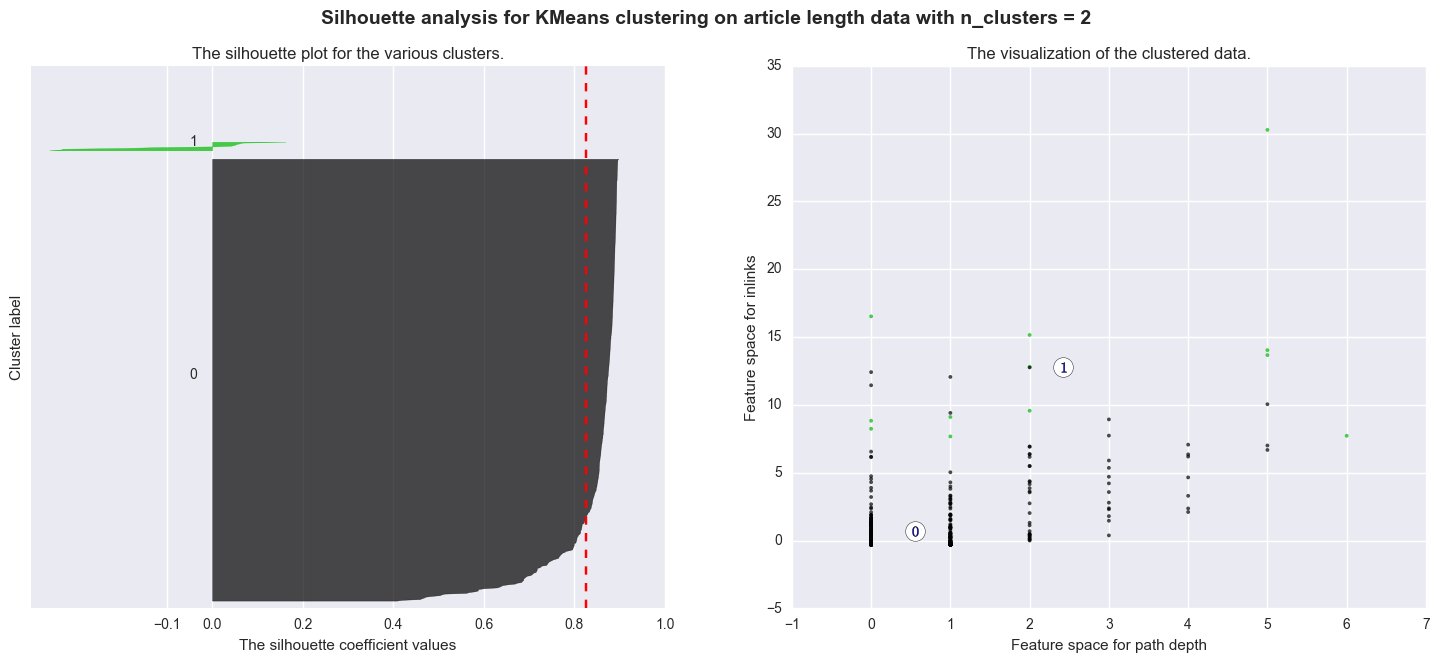

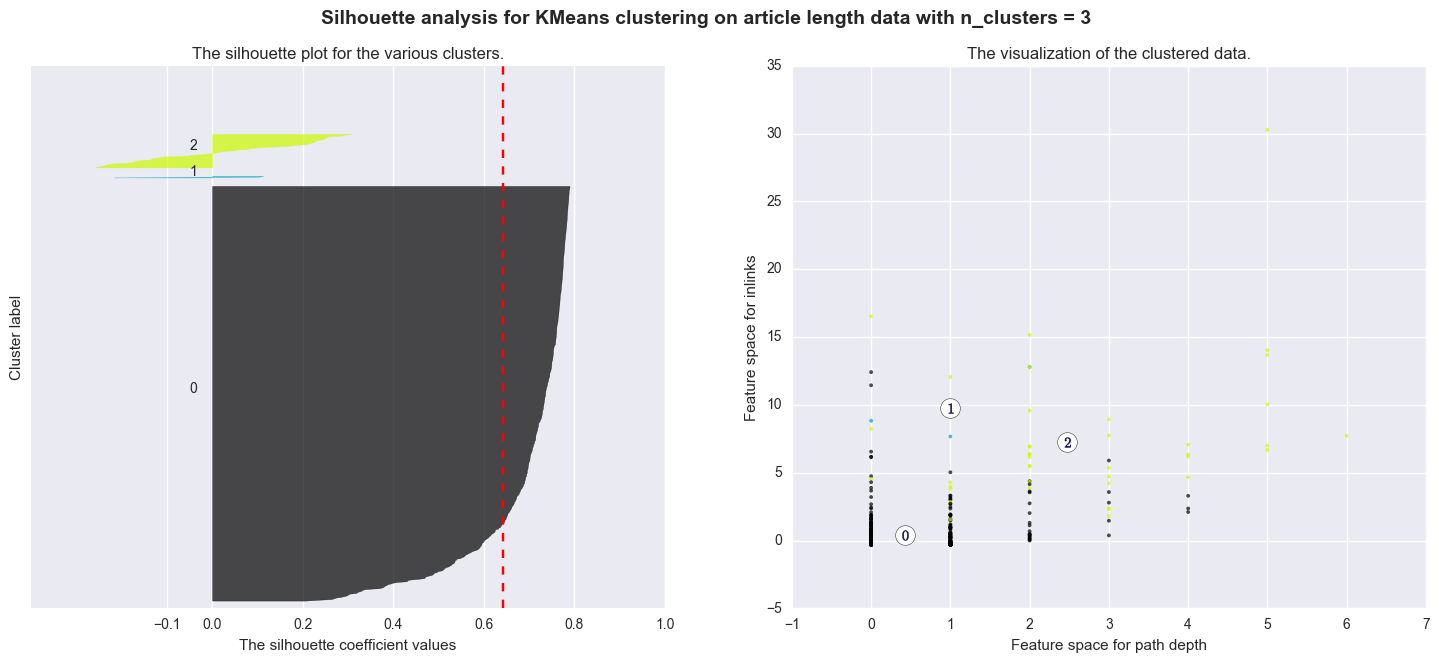

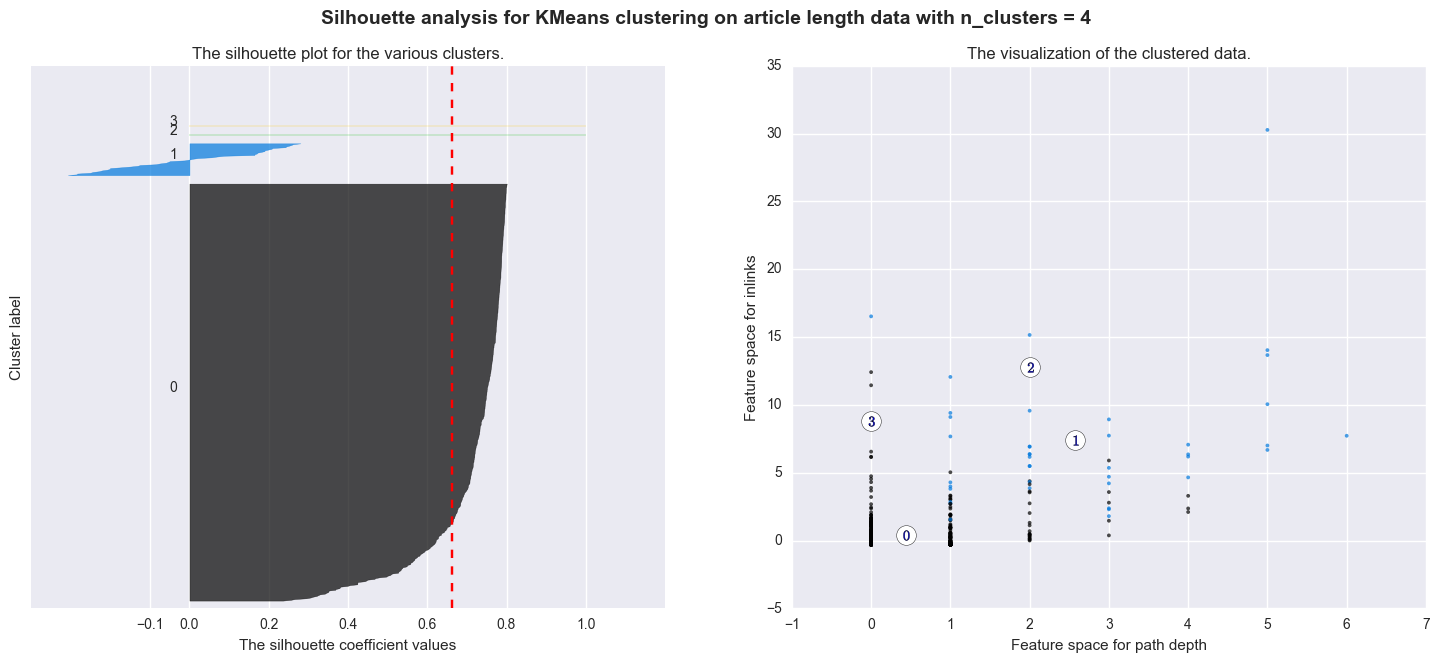

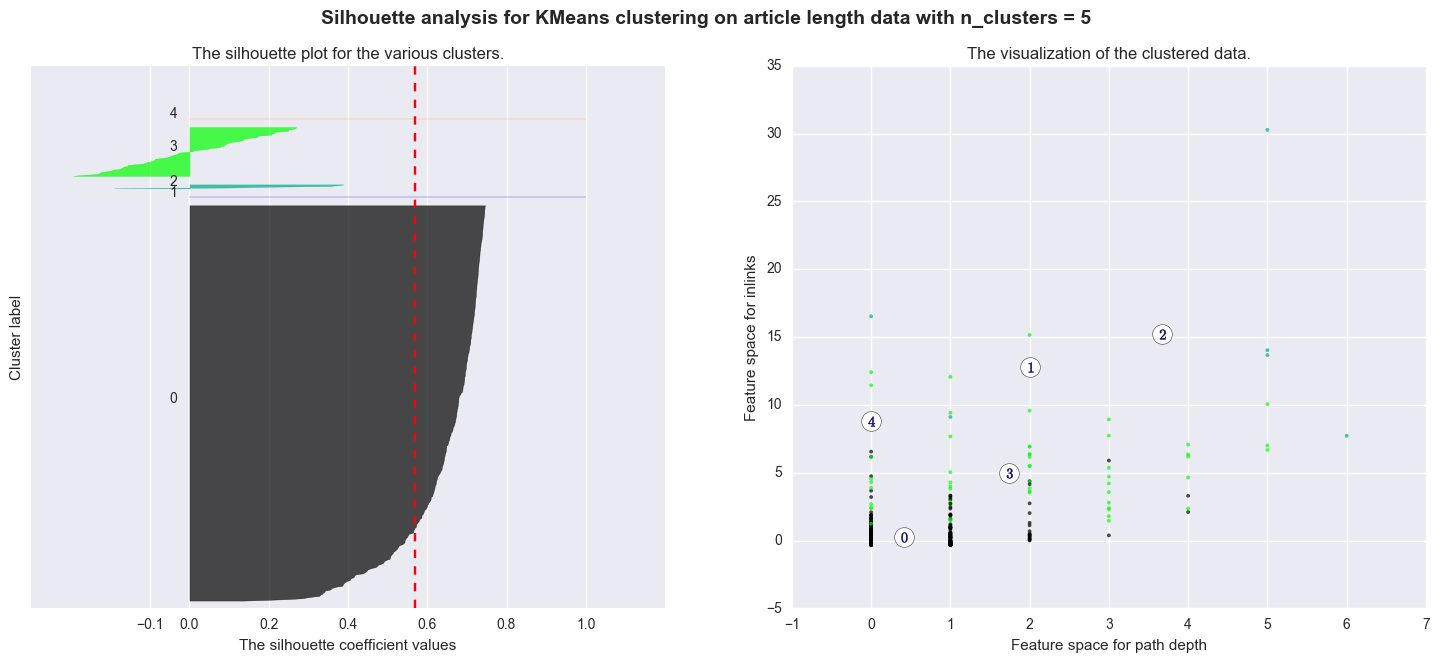

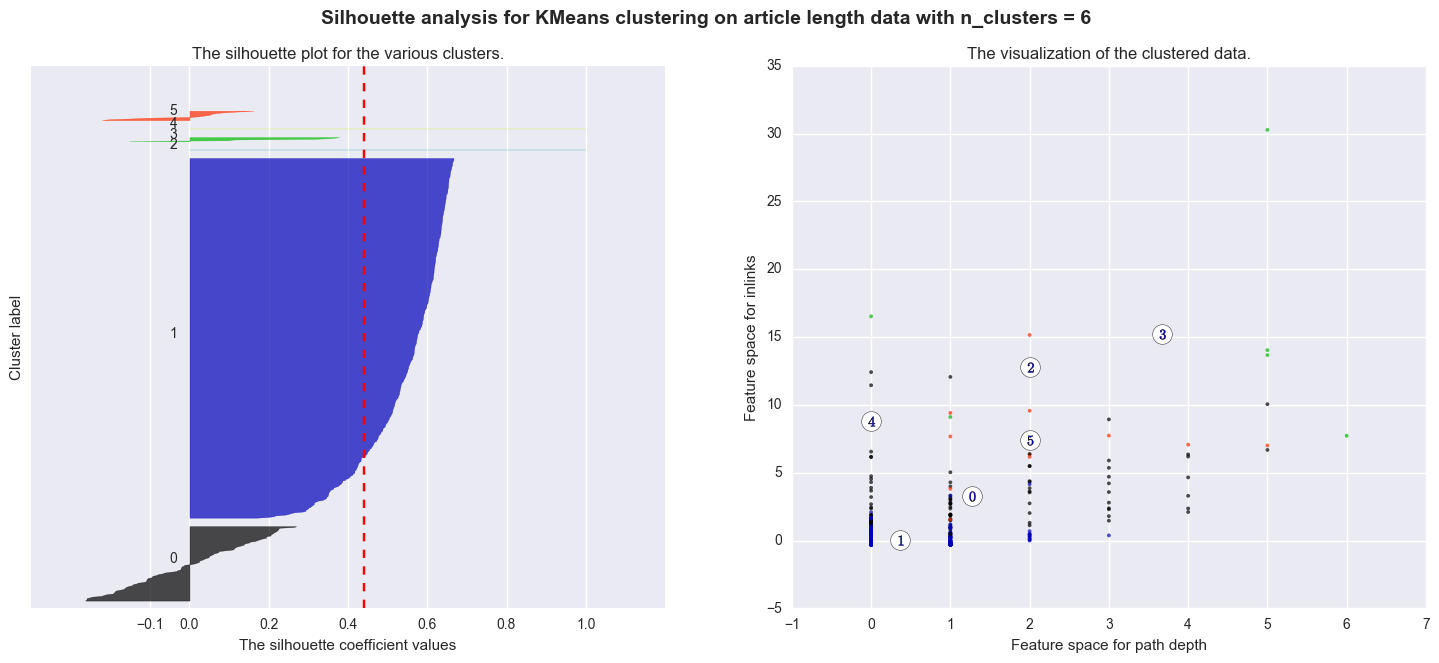

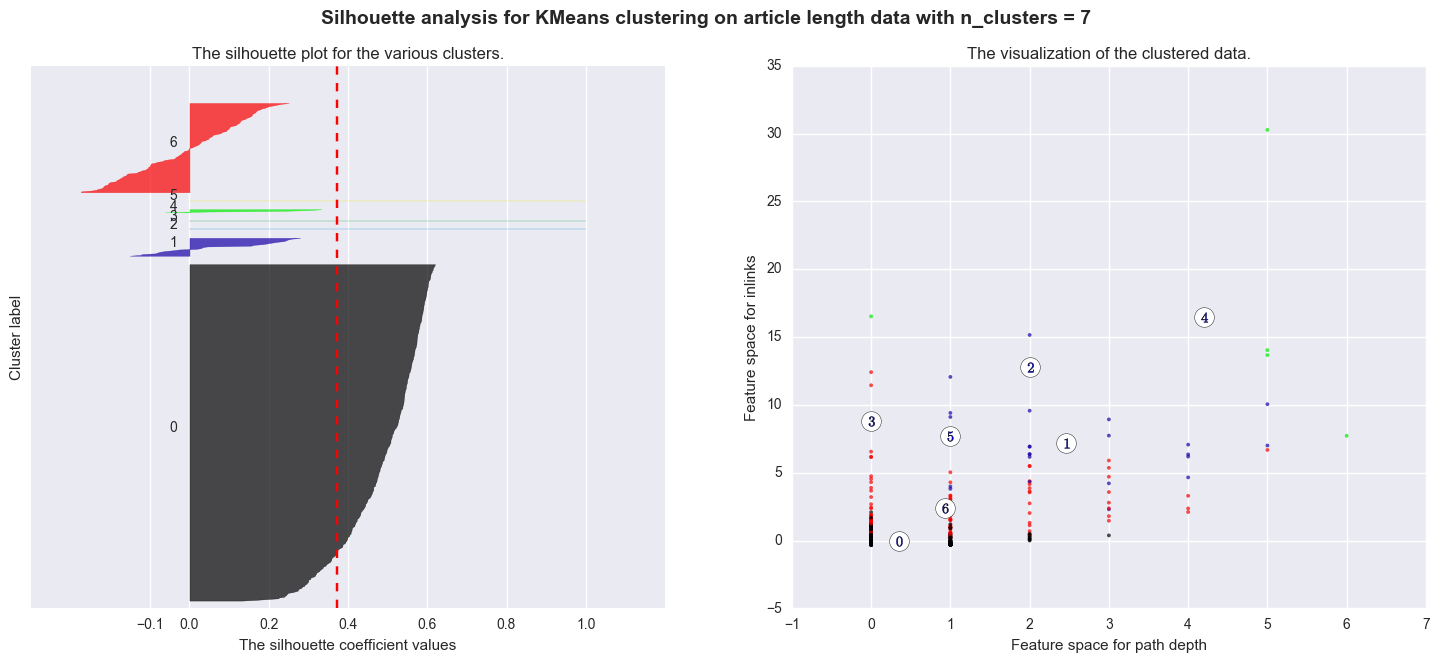

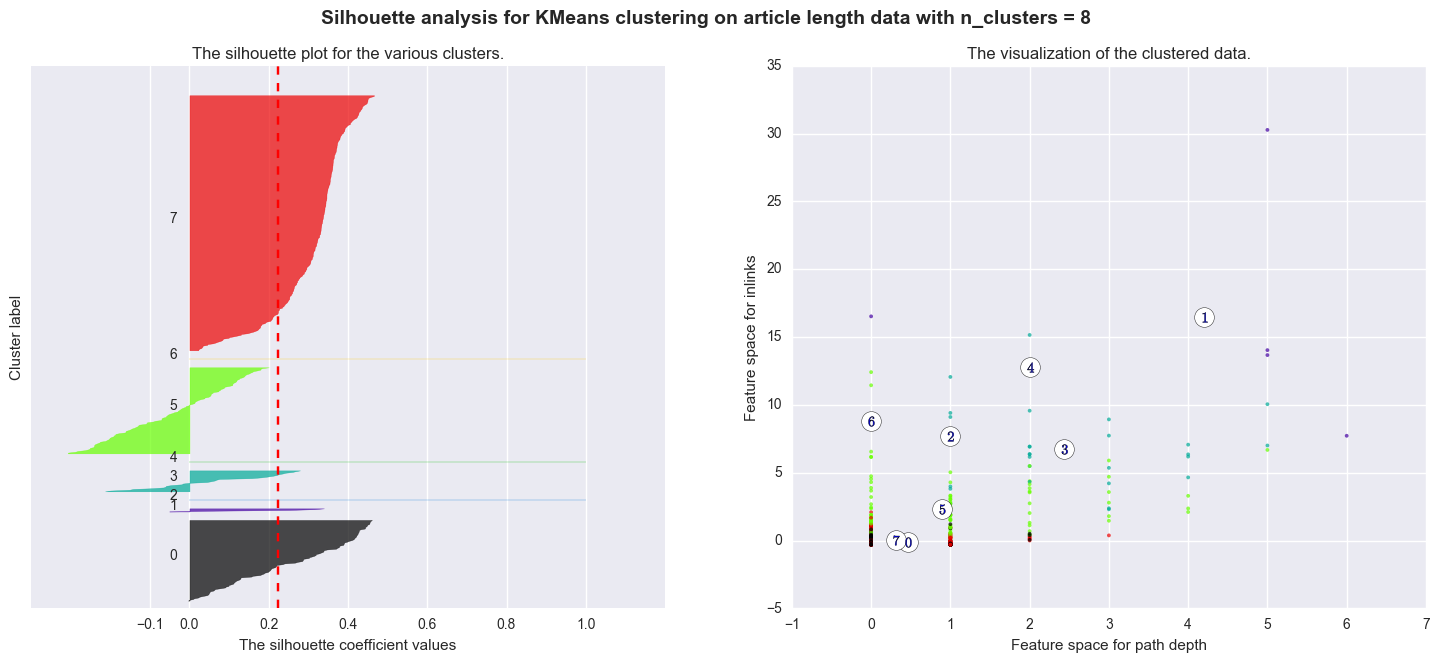

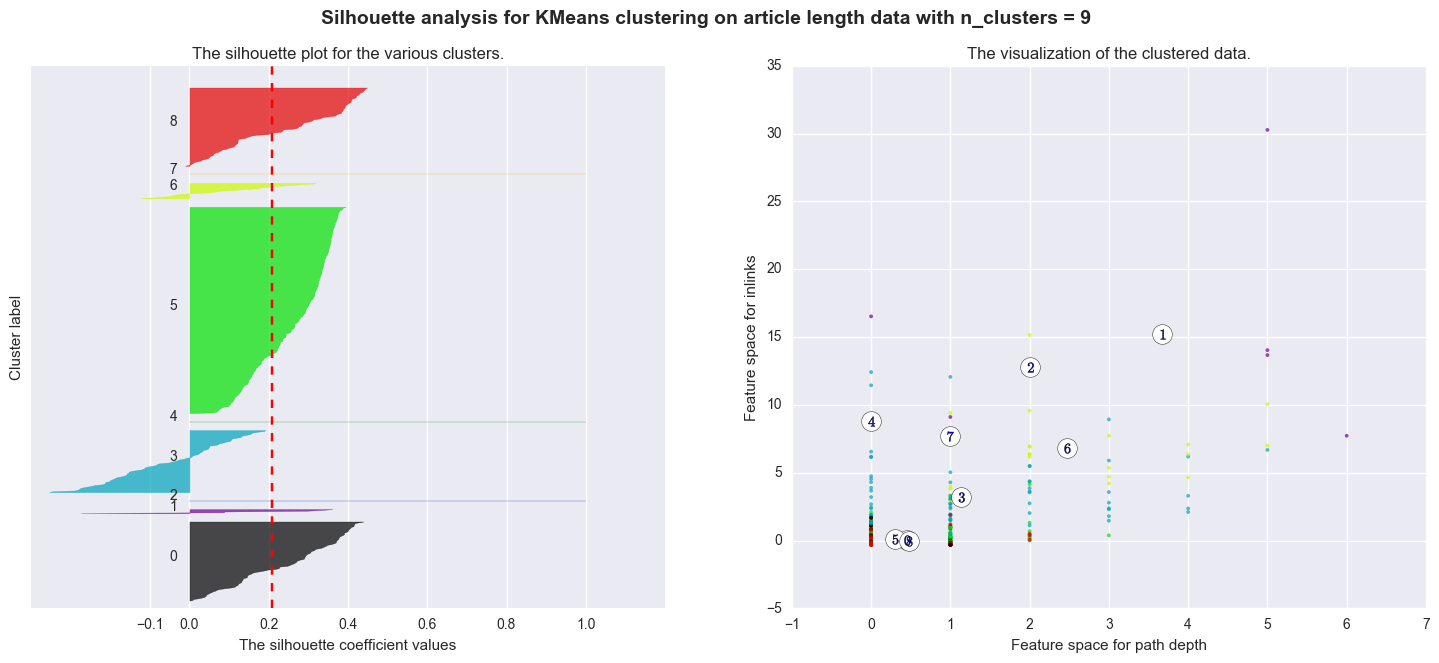

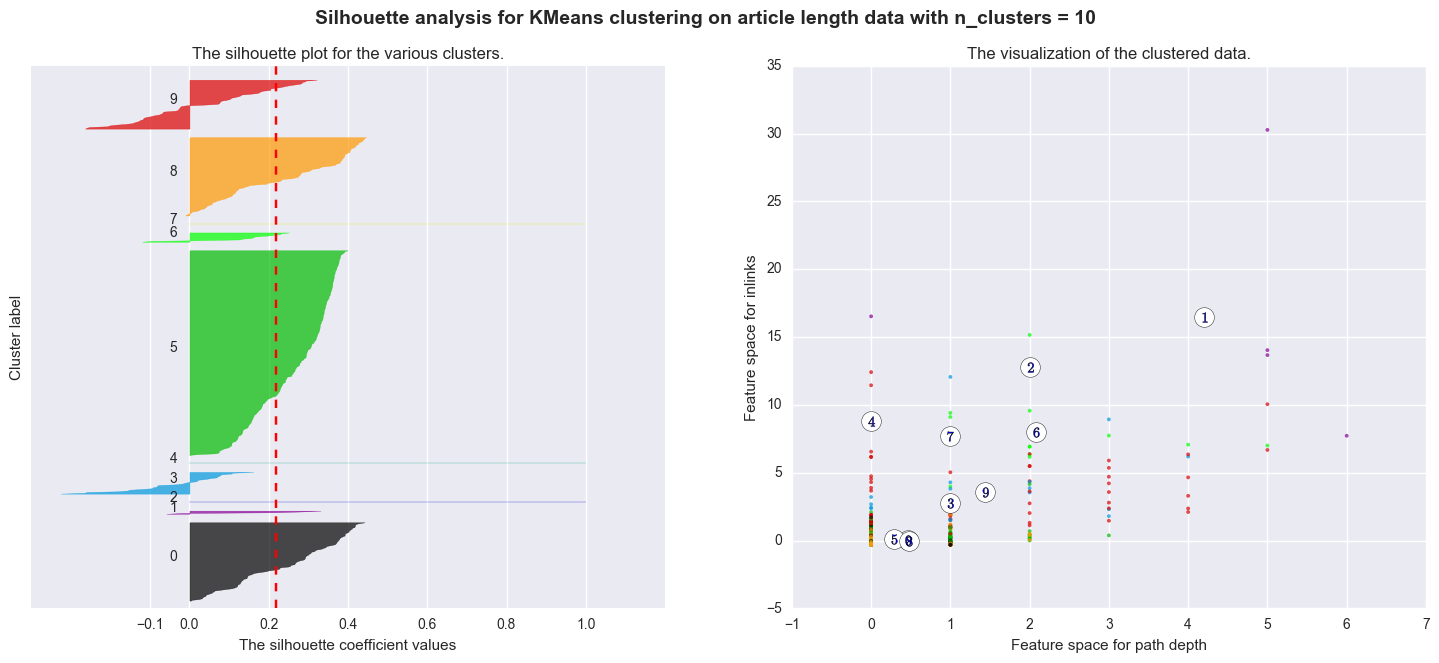

In [13]:
clust_array = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)
    clust_array.append({'cnum':n_clusters,'centers':clusterer.cluster_centers_,'labels':cluster_labels,'silscore':silhouette_avg})
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(numpy.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples       
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[0], X[1], marker='.', s=30, lw=0, alpha=0.7,
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
    # Labeling the clusters
    centers = clusterer.cluster_centers_  
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for path depth")
        ax2.set_ylabel("Feature space for inlinks")
        plt.suptitle(("Silhouette analysis for KMeans clustering on article length data "
                  "with n_clusters = %d" % n_clusters % silhouette_avg),
                 fontsize=14, fontweight='bold')
        filnum = str(n_clusters)
        plt.savefig('ALL_ClusterTests_Clust_No-'+filnum+'.png')
    plt.show()

In [14]:
sildf = pandas.DataFrame(clust_array)
sildf

centers  cnum  \
0  [[0.551663747811, 0.701076121557, 0.5829684763...     2   
1  [[0.432835820896, 0.379752182484, 0.3453824626...     3   
2  [[0.43413729128, 0.412410590308, 0.36108534322...     4   
3  [[0.409001956947, 0.234956737929, 0.2920743639...     5   
4  [[1.27835051546, 3.31375218829, 2.07345360825,...     6   
5  [[0.351724137931, -0.0154702522952, 0.09942528...     7   
6  [[0.466666666667, -0.083258460617, -0.08571428...     8   
7  [[0.456310679612, 0.017829883373, 0.1674757281...     9   
8  [[0.460784313725, 0.00715254655321, 0.16421568...    10   

                                              labels  silscore  
0  [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.826595  
1  [1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, ...  0.642191  
2  [3, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...  0.661680  
3  [4, 0, 0, 0, 3, 1, 3, 0, 3, 3, 0, 0, 0, 3, 3, ...  0.569055  
4  [4, 1, 1, 1, 0, 2, 5, 1, 0, 0, 1, 1, 1, 0, 0, ...  0.439782  
5  [3, 0, 0, 0, 6, 2, 5, 0, 1, 6, 0, 0, 0, 6, 6, ...  0.373391  
6  [6, 7, 7, 7, 5, 4, 2, 7, 3, 5, 7, 7, 7, 5, 5, ...  0.224115  
7  [4, 5, 5, 5, 3, 2, 7, 5, 3, 3, 5, 5, 5, 3, 3, ...  0.209193  
8  [4, 5, 5, 5, 3, 2, 7, 5, 3, 9, 5, 5, 5, 3, 3, ...  0.218550

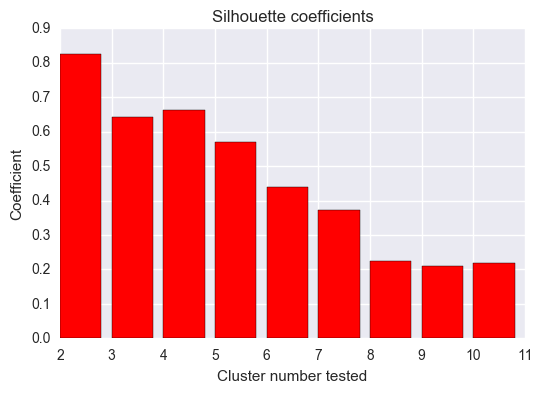

In [15]:

sil1 = range_n_clusters
sil2 = sildf['silscore']
plt.bar(sil1, sil2, color='red')
plt.title('Silhouette coefficients')
plt.xlabel('Cluster number tested')
plt.ylabel('Coefficient')
plt.show()

In [58]:
import sklearn.metrics


In [85]:
clusterer = sklearn.cluster.KMeans(n_clusters=2)


In [62]:
cluster_suggestions = clusterer.fit_predict(Rent_vs_Crime2015)
cluster_suggestions

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [63]:
import sklearn.metrics


In [64]:
sklearn.metrics.silhouette_score(Rent_vs_Crime2015, cluster_suggestions)

0.8338551737125719

In [66]:

x = Rent_vs_Crime2015['lat']
y = Rent_vs_Crime2015['lon']

In [70]:
import numpy
colouring = numpy.array(['red', 'black'])

In [82]:
colour_by_cluster = colouring[cluster_suggestions]
colour_by_cluster.view

<function view>

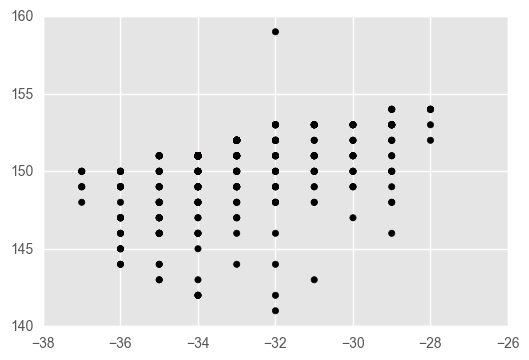

In [84]:
matplotlib.pyplot.scatter(x,y, color=colour_by_cluster)



In [95]:
clusterer1 = sklearn.cluster.KMeans(n_clusters=5)

In [96]:
cluster_suggestions1 = clusterer1.fit_predict(Rent_vs_Crime2015)
cluster_suggestions1

array([4, 0, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 3, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 2, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 1, 0, 3, 3, 3,
       1, 1, 0, 3, 2, 0, 1, 4, 1, 3, 0, 3, 3, 3, 0, 0, 0, 0, 2, 3, 3, 3, 3,
       2, 1, 3, 2, 4, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3,
       1, 0, 3, 1, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 0, 1, 0, 0, 1, 0, 3, 3, 0, 1, 3, 2, 3, 3, 3, 0, 0, 0,
       3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 3, 2, 0, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [97]:
sklearn.metrics.silhouette_score(Rent_vs_Crime2015, cluster_suggestions1)

0.44187179116155018

In [98]:
import numpy
colouring = numpy.array(['purple', 'pink', 'blue', 'orange', 'green'])

In [100]:
colour_by_cluster = colouring[cluster_suggestions1]


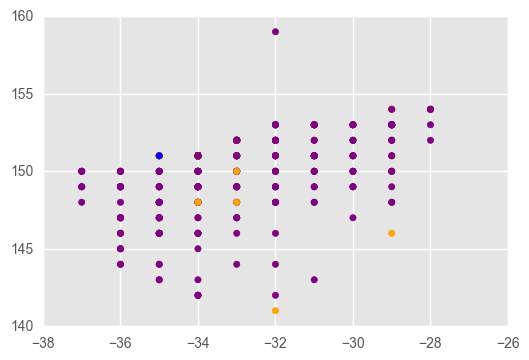

In [101]:
matplotlib.pyplot.scatter(x,y, color=colour_by_cluster)



# Finding Correlation of Features

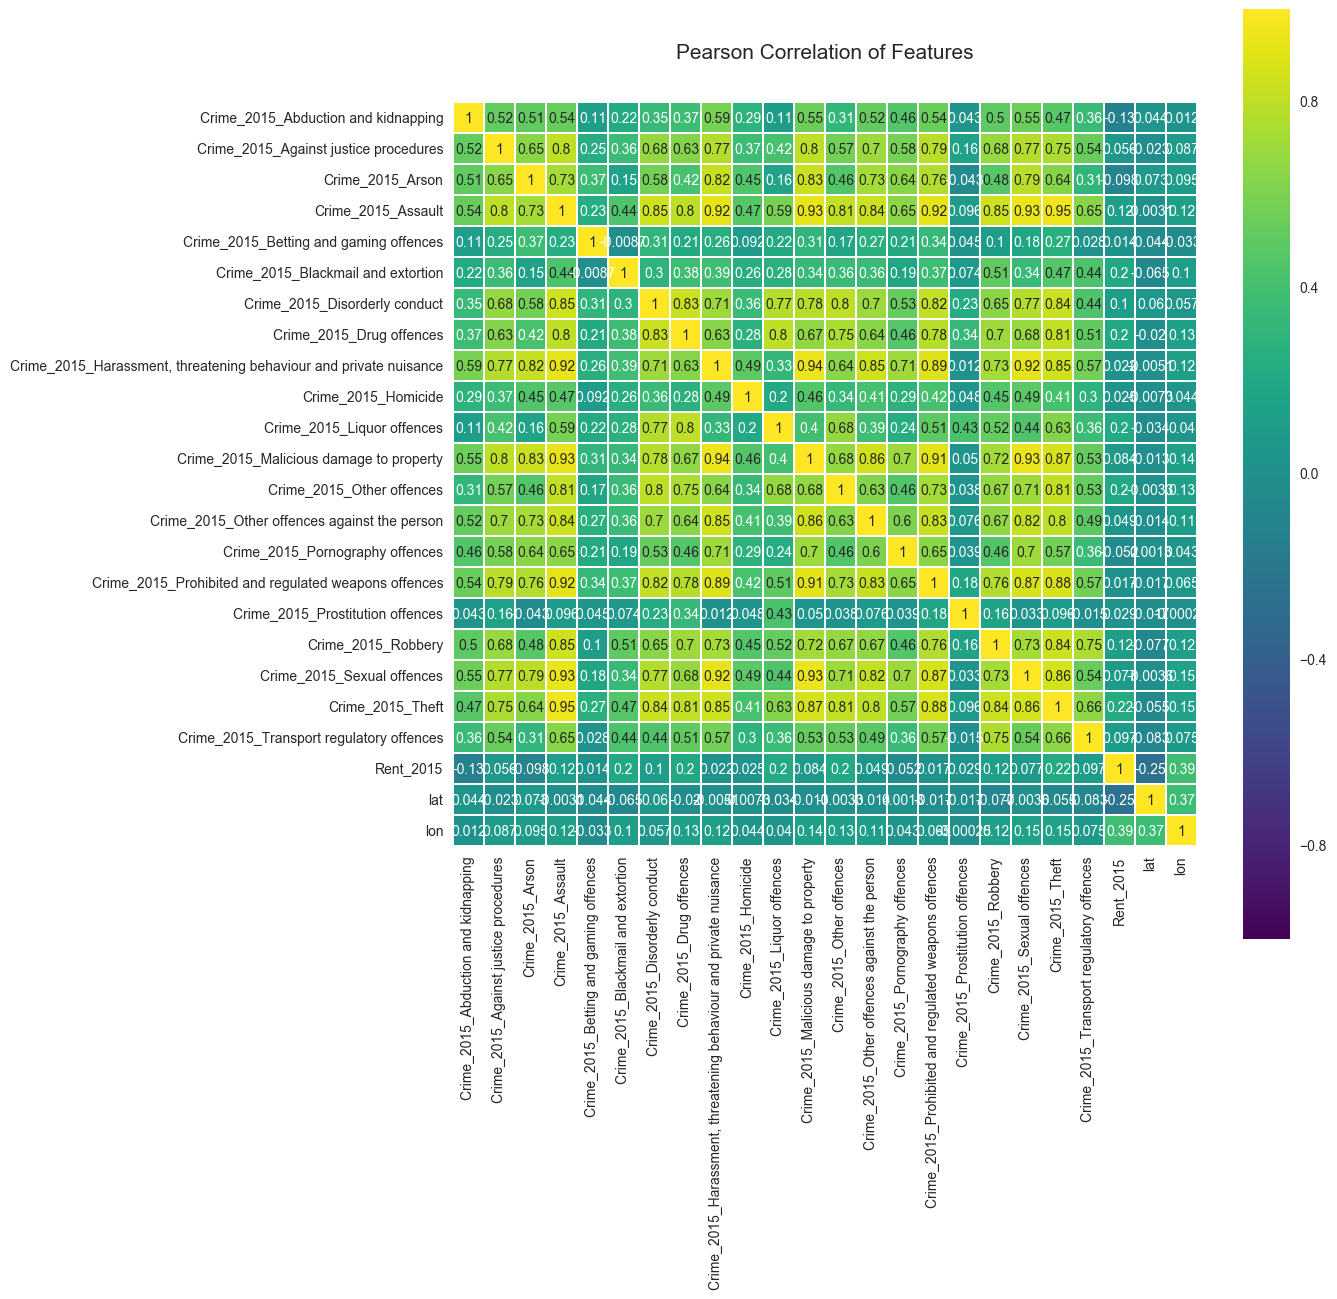

In [16]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Rent_vs_Crime2015.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Running Regressors

In [20]:
Rent_vs_Crime2014.columns.unique()

array(['Crime_2014_Abduction and kidnapping',
       'Crime_2014_Against justice procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting and gaming offences',
       'Crime_2014_Blackmail and extortion',
       'Crime_2014_Disorderly conduct', 'Crime_2014_Drug offences',
       'Crime_2014_Harassment, threatening behaviour and private nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor offences',
       'Crime_2014_Malicious damage to property',
       'Crime_2014_Other offences',
       'Crime_2014_Other offences against the person',
       'Crime_2014_Pornography offences',
       'Crime_2014_Prohibited and regulated weapons offences',
       'Crime_2014_Prostitution offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual offences', 'Crime_2014_Theft',
       'Crime_2014_Transport regulatory offences', 'Rent_2014', 'lat',
       'lon'], dtype=object)

In [17]:
import sklearn.tree

In [25]:
dtc = sklearn.tree.DecisionTreeRegressor(max_depth=10)

In [26]:
X = Rent_vs_Crime2014[['Crime_2014_Abduction and kidnapping',
       'Crime_2014_Against justice procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting and gaming offences',
       'Crime_2014_Blackmail and extortion',
       'Crime_2014_Disorderly conduct', 'Crime_2014_Drug offences',
       'Crime_2014_Harassment, threatening behaviour and private nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor offences',
       'Crime_2014_Malicious damage to property',
       'Crime_2014_Other offences',
       'Crime_2014_Other offences against the person',
       'Crime_2014_Pornography offences',
       'Crime_2014_Prohibited and regulated weapons offences',
       'Crime_2014_Prostitution offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual offences', 'Crime_2014_Theft',
       'Crime_2014_Transport regulatory offences','lat',
       'lon']]
y = Rent_vs_Crime2014.Rent_2014
dtc.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [27]:
dtc.feature_importances_



array([ 0.01065126,  0.00305433,  0.07422177,  0.0042921 ,  0.00260792,
        0.00094543,  0.00622011,  0.02917133,  0.02892315,  0.00186402,
        0.01613241,  0.01632745,  0.03623187,  0.00213724,  0.00053516,
        0.01537957,  0.0194742 ,  0.01445984,  0.02824501,  0.04310289,
        0.00863827,  0.27538991,  0.36199477])

In [28]:
features = X.columns
feature_importances = dtc.feature_importances_

features_df = pandas.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()


Features  Importance Score
22                        lon          0.361995
21                        lat          0.275390
2            Crime_2014_Arson          0.074222
19           Crime_2014_Theft          0.043103
12  Crime_2014_Other offences          0.036232

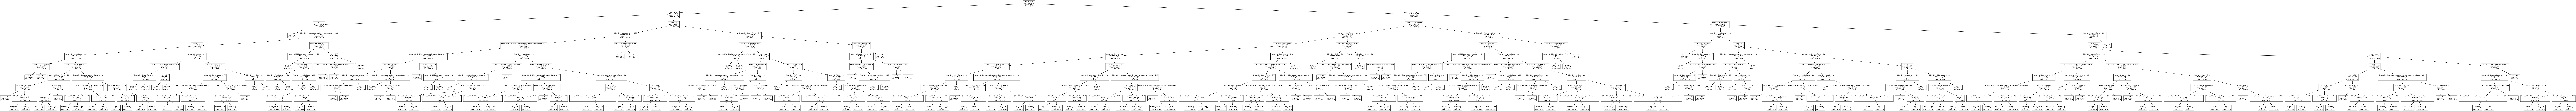

In [30]:
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['Crime_2014_Abduction and kidnapping',
       'Crime_2014_Against justice procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting and gaming offences',
       'Crime_2014_Blackmail and extortion',
       'Crime_2014_Disorderly conduct', 'Crime_2014_Drug offences',
       'Crime_2014_Harassment, threatening behaviour and private nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor offences',
       'Crime_2014_Malicious damage to property',
       'Crime_2014_Other offences',
       'Crime_2014_Other offences against the person',
       'Crime_2014_Pornography offences',
       'Crime_2014_Prohibited and regulated weapons offences',
       'Crime_2014_Prostitution offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual offences', 'Crime_2014_Theft',
       'Crime_2014_Transport regulatory offences','lat',
       'lon'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [31]:
import sklearn.grid_search
brute_force = sklearn.grid_search.GridSearchCV(
    sklearn.tree.DecisionTreeRegressor(),
    param_grid = {
        'max_depth': [1,2,3,4,5,6,7,8,9,10,20]
        
        
    },
    cv=10
    )
brute_force.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [32]:
brute_force.best_params_



{'max_depth': 2}

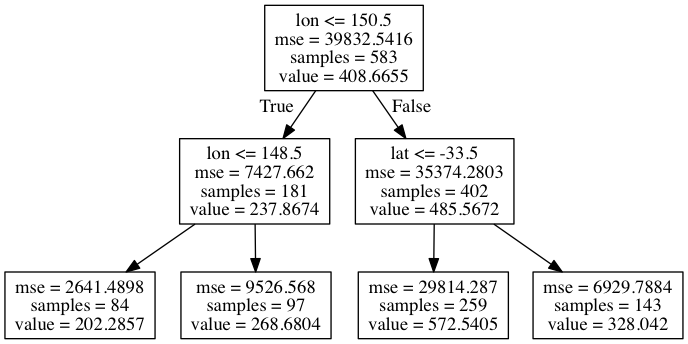

In [33]:
File_obj = StringIO()
sklearn.tree.export_graphviz(brute_force.best_estimator_, 
                             out_file=File_obj, feature_names=['Crime_2014_Abduction and kidnapping',
       'Crime_2014_Against justice procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting and gaming offences',
       'Crime_2014_Blackmail and extortion',
       'Crime_2014_Disorderly conduct', 'Crime_2014_Drug offences',
       'Crime_2014_Harassment, threatening behaviour and private nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor offences',
       'Crime_2014_Malicious damage to property',
       'Crime_2014_Other offences',
       'Crime_2014_Other offences against the person',
       'Crime_2014_Pornography offences',
       'Crime_2014_Prohibited and regulated weapons offences',
       'Crime_2014_Prostitution offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual offences', 'Crime_2014_Theft',
       'Crime_2014_Transport regulatory offences','lat',
       'lon'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [34]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 50,min_samples_split=20)
    
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [35]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pandas.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

Features  Importance Score
22                        lon          0.393840
21                        lat          0.295705
2            Crime_2014_Arson          0.075672
12  Crime_2014_Other offences          0.030141
19           Crime_2014_Theft          0.029073

In [36]:
import sklearn.ensemble

In [37]:
brute_force = sklearn.grid_search.GridSearchCV(
sklearn.ensemble.RandomForestRegressor(),
    param_grid = {
    'n_estimators' :[1,5,10,20,30,40],
   'max_depth':[2,5,10,20],
    'max_features':[2,3,4]
        
        }
)

In [38]:
brute_force.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 20, 30, 40], 'max_features': [2, 3, 4], 'max_depth': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [39]:
brute_force.best_params_

{'max_depth': 20, 'max_features': 3, 'n_estimators': 30}

## This score seems wierd

In [40]:
brute_force.best_score_

-0.68982287908821371

# Running Classifiers ( found code in Kaggle )

In [48]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Going to use these 5 base models for the stacking
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;

In [49]:
# Some useful parameters which will come in handy later on
ntrain = Rent_vs_Crime2015.shape[0]
ntest = Rent_vs_Crime2014.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

In [50]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [51]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [52]:

# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [53]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = Rent_vs_Crime2014['Rent_2014'].ravel()
train = Rent_vs_Crime2014.drop(['Rent_2014'], axis=1)
x_train = Rent_vs_Crime2014.values # Creates an array of the train data
x_test = Rent_vs_Crime2014.values # Creats an array of the test data

In [54]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

/Users/nerenevaz/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:267: UserWarning:

Warm-start fitting without increasing n_estimators does not fit new trees.



KeyboardInterrupt: 

In [ ]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

In [ ]:
rf_features = [ 0.06049704  ,0.01713102 , 0.05719719,  0.03873599,  0.04612742 , 0.0079796,
  0.0218849,   0.05008074 , 0.0454205,   0.05530954,  0.00999356,  0.04186819,
  0.06507149 , 0.06422153 , 0.03433224  ,0.02247221,  0.05073112,  0.00869454,
  0.03475445 , 0.05187617 , 0.05900749 , 0.04285123 , 0.11376181]
et_features = [ 0.05338788 , 0.0318339 ,  0.04583381 , 0.04996546,  0.0469876 ,  0.00618438,
  0.04471003,  0.04082761  ,0.03174186,  0.05134008,  0.02307373,  0.03304739,
  0.05821561,  0.04808055,  0.04199113,  0.04452587,  0.04529987,  0.03568074,
  0.043909,    0.05556707,  0.04429361,  0.04104753,  0.08245529]
ada_features = [ 0.044,  0.056 , 0.046,  0.014,  0.044,  0.  ,   0.01,   0.008 , 0.06 ,  0.096 , 0.,
  0.008 , 0.008,  0.054,  0.002,  0.,     0.006,  0. ,    0.006,  0.002,  0.07,
  0.044,  0.422]
gb_features = [  1.55716204e-02,   1.83358143e-04 ,  1.34306881e-02 ,  4.83807247e-04,
   7.22876261e-04  , 1.34136767e-04 ,  2.55468842e-04  , 9.97844382e-04,
   1.44591720e-03 ,  7.00106549e-03 ,  2.58555811e-05  , 1.08061384e-03,
   8.23850244e-04 ,  1.36416884e-03 ,  8.70780025e-04  , 6.35861878e-04,
   8.36605732e-04 ,  1.84820107e-04 ,  1.00999558e-03  , 9.87767353e-04,
   8.09630906e-04 ,  7.57926491e-03 ,  2.94770456e-02]

In [ ]:
cols = Rent_vs_Crime2014.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })
feature_dataframe

In [ ]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [ ]:

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe

In [ ]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

In [ ]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')